In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pylab
import random
import pingouin as pg

In [73]:
np.random.seed(24)
df = pd.DataFrame({'age': np.round(np.random.normal(30,4,100))})
df.head()

,age
0,35.0
1,27.0
2,29.0
3,26.0
4,26.0


In [74]:
copy = df.sort_values('age').head(20).copy()

In [75]:
copy['rank'] = np.arange(1,21)
copy['correction_rank'] = [1,
                           (2+3+4)/3, (2+3+4)/3, (2+3+4)/3,
                           (5+6+7+8)/4, (5+6+7+8)/4, (5+6+7+8)/4, (5+6+7+8)/4,
                          9,
                          (10+11+12+13+14)/5, (10+11+12+13+14)/5, (10+11+12+13+14)/5, (10+11+12+13+14)/5, (10+11+12+13+14)/5,
                          (15+16+17+18+19)/5, (15+16+17+18+19)/5, (15+16+17+18+19)/5, (15+16+17+18+19)/5, (15+16+17+18+19)/5,
                          20]
copy['probability'] = (copy['correction_rank']-0.5)/len(copy)
copy['z_score'] = (copy['probability']-copy['probability'].mean())/copy['probability'].std(ddof=1)
copy['z_score_age'] = (copy['age']-copy['age'].mean())/copy['age'].std(ddof=1)
copy

,age,rank,correction_rank,probability,z_score,z_score_age
66,20.0,1,1.0,0.025,-1.639419,-2.267265
42,22.0,2,3.0,0.125,-1.294278,-1.187615
63,22.0,3,3.0,0.125,-1.294278,-1.187615
35,22.0,4,3.0,0.125,-1.294278,-1.187615
80,23.0,5,6.5,0.300,-0.690282,-0.647790
98,23.0,6,6.5,0.300,-0.690282,-0.647790
8,23.0,7,6.5,0.300,-0.690282,-0.647790
48,23.0,8,6.5,0.300,-0.690282,-0.647790
5,24.0,9,9.0,0.425,-0.258856,-0.107965
68,25.0,10,12.0,0.575,0.258856,0.431860


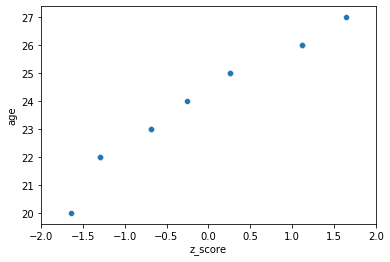

In [76]:
sns.scatterplot(x='z_score', y='age', data=copy)
plt.xlim(-2.0, 2.0)
plt.show()

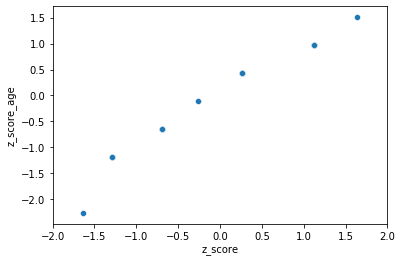

In [77]:
sns.scatterplot(x='z_score', y='z_score_age', data=copy)
plt.xlim(-2.0, 2.0)
plt.show()

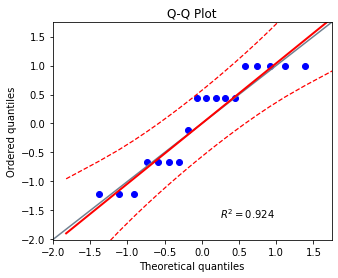

In [78]:
pg.qqplot(df.sort_values('age')['age'].head(20), dist='norm')

$\displaystyle r_{q} = \frac{\sum^{n}_{j=1}(x_{j} - \bar{x})(q_{j} - \bar{q})}{\sqrt{\sum^{n}_{j=1}(x_{j} - \bar{x})^{2}} \sqrt{\sum^{n}_{j=1}(q_{j} - \bar{q})^{2}}}$

In [79]:
# copy['xj-x_bar'] = copy['age']-copy['age'].mean()
# copy['qj-q_bar'] = copy['z_score']-copy['z_score'].mean()
# copy[]

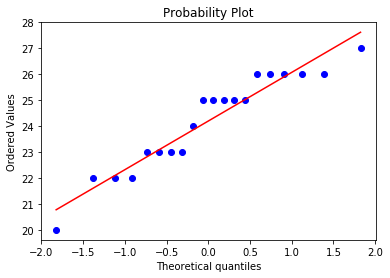

In [80]:
stats.probplot(df.sort_values('age')['age'].head(20), dist='norm', plot=pylab)
pylab.show()

## __Normality Test (QQ-Plot)__

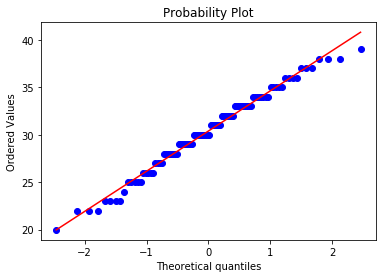

In [81]:
stats.probplot(df['age'], dist='norm', plot=pylab)
pylab.show()

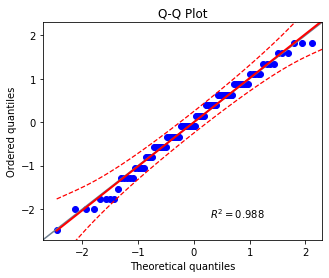

In [82]:
pg.qqplot(df['age'], dist='norm')

## __Shapiro-Wilk Test__

In [83]:
vstats, p = stats.shapiro(df['age'])
alpha = 0.05

# H0 : Data comes from a normal distribution
# H1 : Data not comes from a normal distribution

print('p:', p)
if p < alpha:
    print('The null hyphotesis can be rejected')
else:
    print('The null hyphotesis cannot be rejected')

p: 0.27052995562553406
The null hyphotesis cannot be rejected


## __D'Agostino and Pearson's__

In [84]:
gstat, p2 = stats.normaltest(df['age'])
gstat, p2

(1.870875905637304, 0.39241396908915915)

In [85]:
alpha = 0.05

# H0 : Data comes from normal distribution
# H1 : Data not comes from normal distribution

print("p-value D'Agostino:", p2)
if p2 < alpha:
    print('The null hypothesis can be rejected / Data tidak normal')
else:
    print('The null hypothesis cannot be rejected / Data normal')

p-value D'Agostino: 0.39241396908915915
The null hypothesis cannot be rejected / Data normal


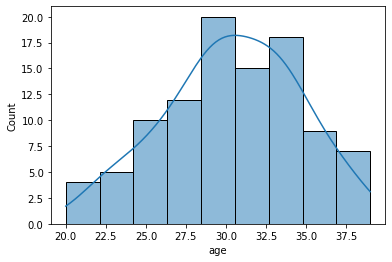

In [86]:
sns.histplot(df['age'], kde=True)
plt.show()

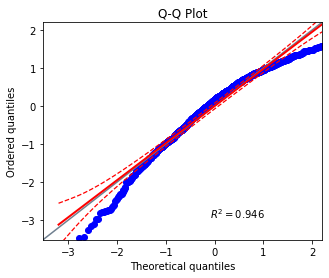

In [87]:
set1 = list(np.random.normal(12, 2, 1000))
set1 = [7000-x**3 for x in set1]
pg.qqplot(set1, dist='norm')

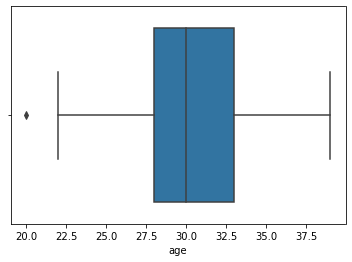

In [88]:
sns.boxplot(x='age', data=df)
plt.show()

In [89]:
df.describe()

,age
count,100.000000
mean,30.380000
std,4.189405
min,20.000000
25%,28.000000
50%,30.000000
75%,33.000000
max,39.000000


## __T-Test One Sample__

\begin{align}
T = \frac{\bar{x} - \mu}{s/\sqrt{n}}
\end{align}

- H0: Age Mean Population = 29
- H1: Age Mean Population != 29

- alpha = 0.05

In [90]:
tstat, pval1 = stats.ttest_1samp(df['age'], 29)

print('p-value', pval1)
print('t-stats', tstat)

p-value 0.001370766043992794
t-stats 3.2940241479630767


## __T-Test One Sample Manual__

In [94]:
age = df['age']
age

0     35.0
1     27.0
2     29.0
3     26.0
4     26.0
      ... 
95    31.0
96    34.0
97    33.0
98    23.0
99    35.0
Name: age, Length: 100, dtype: float64

\begin{align}
H_o : \mu = 29
\end{align}
\begin{align}
H_a : \mu > 29 \textrm{  or  } H_a : \mu < 29 \textrm{  or  } H_a : \mu \neq 29 
\end{align}

In [95]:
mu = 29
x_bar = np.mean(age)
s = np.std(age, ddof=1)
n = len(age)

print('rata-rata sample:', x_bar)
print('simpangan baku sample:', s)
print('banyaknya sample:', n)

rata-rata sample: 30.38
simpangan baku sample: 4.1894046248973265
banyaknya sample: 100


In [96]:
T = (x_bar - mu)/(s/np.sqrt(n))
print('tstats:', T)

tstats: 3.2940241479630767


### __Rejection region if the alternate hypothesis (One Tail):__

\begin{align}
H_o : \mu = 29 //
H_a : \mu > 29
\end{align}

the rejection region will be:

\begin{align}
T > T_{\alpha/2},db = n-1
\end{align}

\begin{align}
T_{\alpha/2},db = n-1 \textrm{ is value of T when the probability is } \alpha \textrm{ and will be used as critical value}
\end{align}
 

## __Rejection Using Tstats__

In [125]:
alpha = 0.05/2
Tcrit = stats.t.ppf(1-alpha, n-1)
print('Critical Value:', Tcrit)
print(1-alpha)

Critical Value: 1.9842169515086827
0.975


T statistics is greater than the critical value(reject Ho)
\begin{align}
T = 3.294 > T_{\alpha/2},db = n-1 = 1.984
\end{align}

## __Rejection Using p-value__

In [126]:
x_axis = [i/10 for i in range(-40,41)]
y_axis = [stats.t.pdf(i,n-1) for i in x_axis]

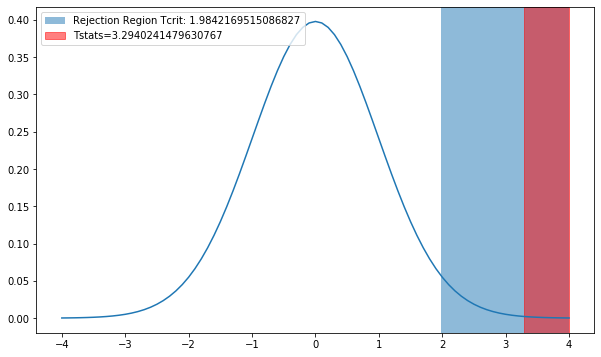

In [127]:
plt.figure(figsize=(10,6))
plt.plot(x_axis, y_axis)
plt.axvspan(Tcrit,4,alpha=0.5,label=f'Rejection Region Tcrit: {Tcrit}')
plt.axvspan(T,4,alpha=0.5,color='red', label=f'Tstats={T}')
plt.legend(loc='upper left')
plt.show()

In [108]:
print(f'p_value: P(T>{T}) = ', stats.t.sf(T, n-1))

p_value: P(T>3.2940241479630767) =  0.000685383021996397


### __rejection region if the alternate hypothesis (One Tail):__

\begin{align}
H_o : \mu = 29 // 
H_a : \mu < 29
\end{align}

the rejection region will be:

\begin{align}
T < -T_{\alpha/2},db = n-1
\end{align}

\begin{align}
T_{\alpha/2},db = n-1 \textrm{ is value of T when the probability is } \alpha \textrm{ and will be used as critical value}
\end{align}
 

In [116]:
alpha = 0.05/2
Tcrit = stats.t.ppf(1-alpha,n-1)
print('critical value:', -Tcrit)
print('Tstats:', T)

critical value: -1.9842169515086827
Tstats: 3.2940241479630767


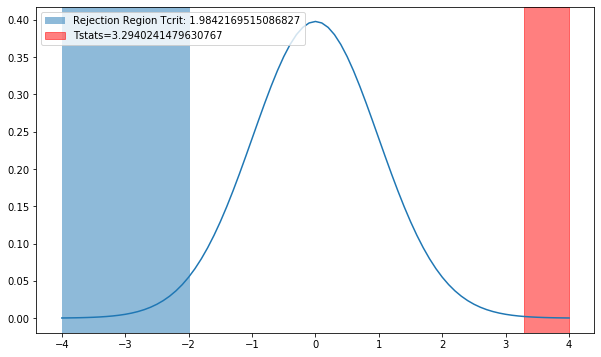

In [115]:
plt.figure(figsize=(10,6))
plt.plot(x_axis, y_axis)
plt.axvspan(-Tcrit,-4,alpha=0.5,label=f'Rejection Region Tcrit: {Tcrit}')
plt.axvspan(T,4,alpha=0.5,color='red', label=f'Tstats={T}')
plt.legend(loc='upper left')
plt.show()

T statistics is greater than the critical value (don't reject Ho):
\begin{align}
T = 3.29 > -T_{\alpha/2},db = n-1 = -1.984
\end{align}

rejection region using p-value

In [118]:
print('p-value', stats.t.sf(-T, n-1))

p-value 0.9993146169780036


### __rejection region if the alternate hypothesis (Two Tails):__

\begin{align}
H_a : \mu \neq 29
\end{align}

the rejection region will be:

\begin{align}
T < -T_{\alpha/2},db = n-1 \textrm{ or } T > T_{\alpha/2},db = n-1
\end{align}

\begin{align}
T_\alpha,db = n-1 \textrm{ is value of T when the probability is } \alpha \textrm{ and will be used as critical value}
\end{align}
 

In [119]:
alpha = 0.05/2
Tcrit = stats.t.ppf(1-alpha, n-1) #  untuk mencari nilai kritikal pada tabel T-Distribution
print('Critical Value Left:', -Tcrit)
print('Critical Value Right:', Tcrit)

Critical Value Left: -1.9842169515086827
Critical Value Right: 1.9842169515086827


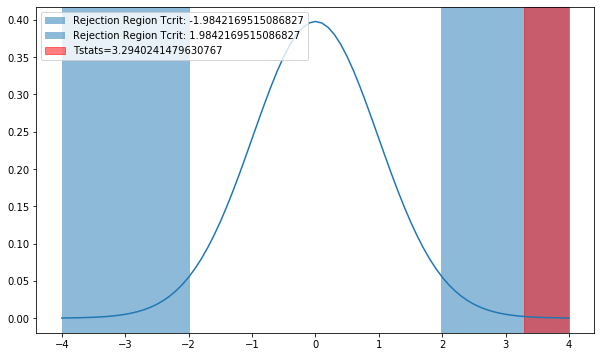

In [121]:
plt.figure(figsize=(10,6))
plt.plot(x_axis, y_axis)
plt.axvspan(-Tcrit,-4,alpha=0.5,label=f'Rejection Region Tcrit: {-Tcrit}')
plt.axvspan(Tcrit,4,alpha=0.5,label=f'Rejection Region Tcrit: {Tcrit}')
plt.axvspan(T,4,alpha=0.5,color='red', label=f'Tstats={T}')
plt.legend(loc='upper left')
plt.show()

T statistics is greater than the critical value (reject Ho):
\begin{align}
T = 3.29 > T_{\alpha},db = n-1 = 1.984
\end{align}

rejection region using p-value (reject Ho)

In [124]:
print('p-value', stats.t.sf(T, n-1))

p-value 0.000685383021996397
